<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Satellite Image Data <br><br><br>Analysis using numpy</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Data Source: Satellite Image from WIFIRE Project</p>


WIFIRE is an integrated system for wildfire analysis, with specific regard to changing urban dynamics and climate. The system integrates networked observations such as heterogeneous satellite data and real-time remote sensor data, with computational techniques in signal processing, visualization, modeling, and data assimilation to provide a scalable method to monitor such phenomena as weather patterns that can help predict a wildfire's rate of spread. You can read more about WIFIRE at: https://wifire.ucsd.edu/

In this example, we will analyze a sample satellite image dataset from WIFIRE using the numpy Library.


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Loading the libraries we need: numpy, scipy, matplotlib</p>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Creating a numpy array from an image file:</p> 

<br>
Lets choose a WIFIRE satellite image file as an ndarray and display its type.


In [2]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

# Note: In the video, this is mentioned as an ndarray. Don't worry about the type for now, it should
# still work as usual.
type(photo_data)

imageio.core.util.Array

Let's see what is in this image. 

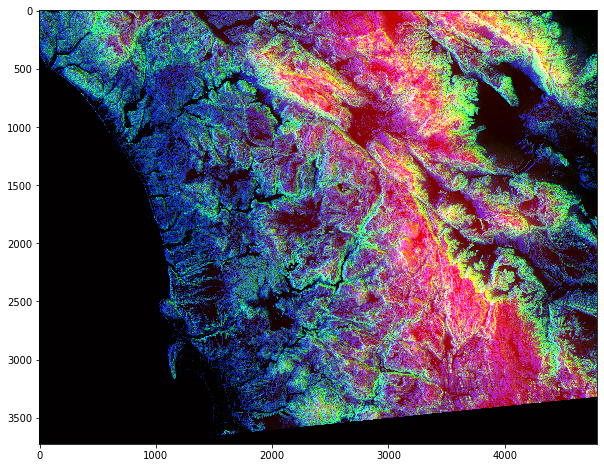

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [8]:
photo_data.shape

#print(photo_data)

(3725, 4797, 3)

The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
RGB Color Mapping in the Photo:</p> <br>
<ul>
<li><p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<li><p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">
BLUE pixel indicates Aspect
</p>
<li><p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
GREEN pixel indicates Slope
</p>
</ul>
<br>
The higher values denote higher altitude, aspect and slope.


In [9]:
photo_data.size

53606475

In [10]:
photo_data.min(), photo_data.max()

(0, 255)

In [11]:
photo_data.mean()

75.8299354508947

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Pixel on the 150th Row and 250th Column</p>

In [12]:
photo_data[150, 250]

Array([ 17,  35, 255], dtype=uint8)

In [13]:
photo_data[150, 250, 1]

35

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Set a Pixel to All Zeros</p>
<br/>
We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

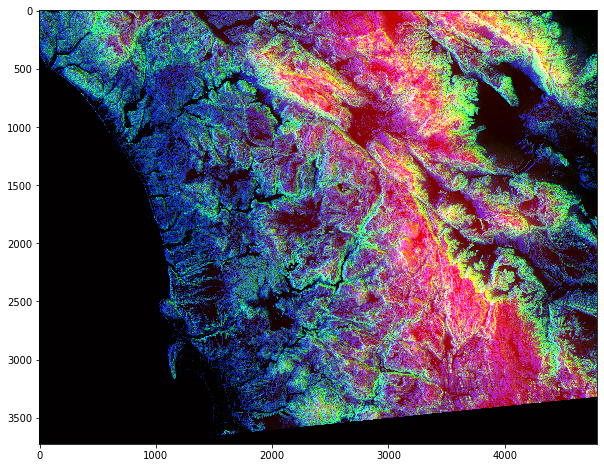

In [16]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data[150, 250] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Changing Colors in a Range<p/>
<br/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

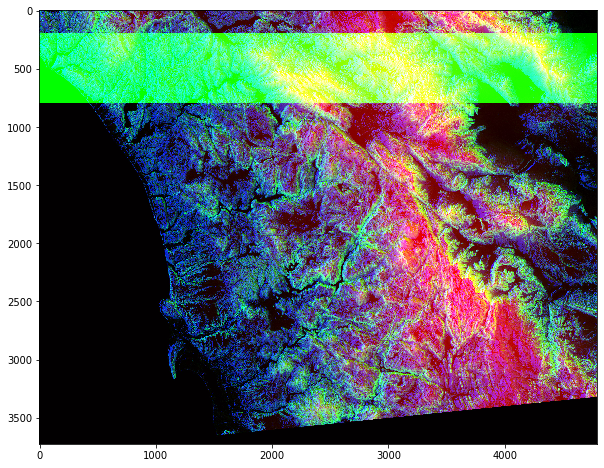

In [19]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[200:800, : ,1] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

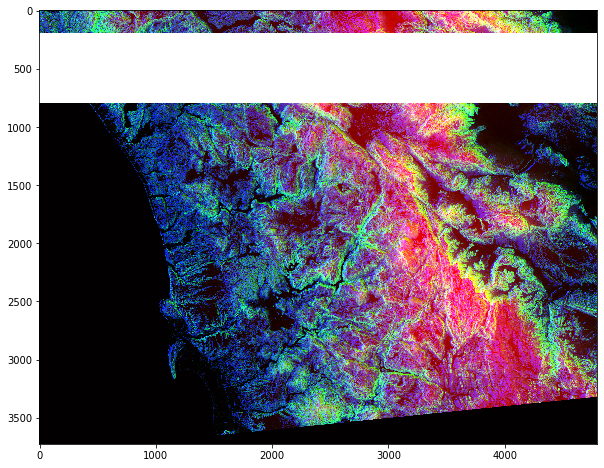

In [20]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[200:800, :] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

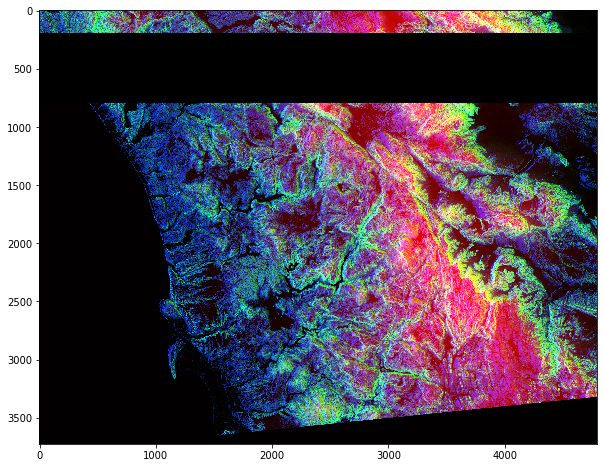

In [21]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

photo_data[200:800, :] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Pick all Pixels with Low Values</p>

In [32]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')
print("Shape of photo_data:", photo_data.shape)
# below creates a boolean array with the same shape as the original array
low_value_filter = photo_data < 150
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (3725, 4797, 3)
Shape of low_value_filter: (3725, 4797, 3)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0.

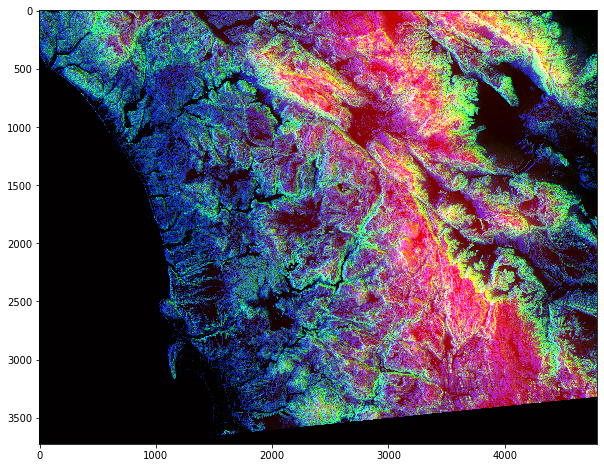

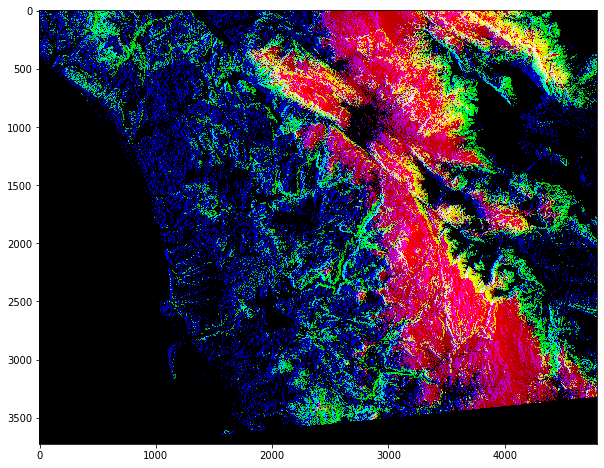

In [33]:
# import random
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
# when indexing via a filter as below, for where the filter is True, the value of RGB that is < 150 is changed to 0 -> the
# second image becomes a lot darker as these values are set to = 0 
photo_data[low_value_filter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
More Row and Column Operations</p><br>
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [35]:
# .arange numpy method creates an array of the argument - in this case 0 to len(photodata)
rows_range = np.arange(len(photo_data))
print(rows_range)
cols_range = rows_range
print(type(rows_range))

[   0    1    2 ... 3722 3723 3724]
<class 'numpy.ndarray'>


In [51]:
# below indexing indexes the photo_data by 00, 11, 22, 33, 44 etc. The value for these indices is set to 255 for all RGB
# colours, and so as can be seen below, a white diagonal line from 0,0 to 3724,3724 is created
photo_data[rows_range, cols_range] = 255

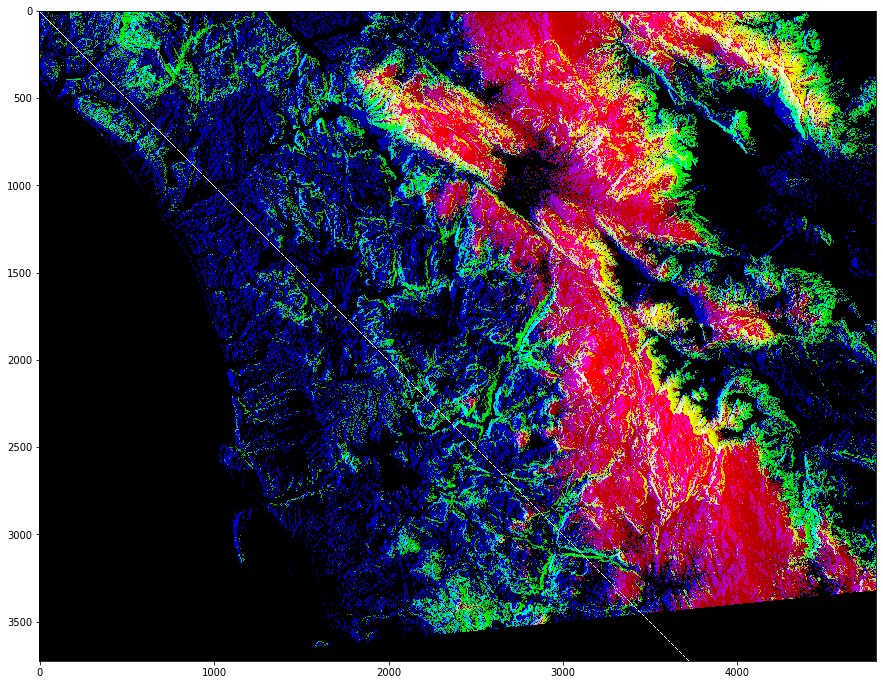

In [52]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Masking Images</p>
<br>Now let us try something even cooler...a mask that is in shape of a circular disc.

<img src="./1494532821.png" align="left" style="width:550px;height:360px;"/>

In [54]:
total_rows, total_cols, total_layers = photo_data.shape
print("photo_data = ", photo_data.shape)

# .ogrid numpy method helps us vectorize the distance from the center which will be a function of variables total_rows
# and total_cols. ogrid returns an ndarray -> in this case 2 vectors, X and Y

# ogrid is a compact method of creating multidimensional ndrray operations in single lines

X, Y = np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

photo_data =  (3725, 4797, 3)
X =  (3725, 1)  and Y =  (1, 4797)


In [71]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "AND center_col = ", center_col)
print(X - center_row)
print(Y - center_col)

# going through the X and Y vectors, the distance from the center gets smaller nearer to the middle of the vector.

dist_from_center = (X - center_row)**2 + (Y - center_col)**2
print('\ndist from center:\n',dist_from_center)
radius = (total_rows / 2)**2
print("\nRadius = ", radius)

# circular_mask is a matrix of True and False values for whether distance from the center is greater than the radius or not
# when greater it is True, lesser it is False. Hence when it is indexed to more central values, we see the retrieved
# matrix is all False -> thus we can see what's inside the circle, and what's outside the circle

circular_mask = (dist_from_center > radius)

# initial print of the circular mask shows only the edges of the matrix, which are indeed True
print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

center_row =  1862.5 AND center_col =  2398.5
[[-1862.5]
 [-1861.5]
 [-1860.5]
 ...
 [ 1859.5]
 [ 1860.5]
 [ 1861.5]]
[[-2398.5 -2397.5 -2396.5 ...  2395.5  2396.5  2397.5]]

dist from center:
 [[9221708.5 9216912.5 9212118.5 ... 9207326.5 9212118.5 9216912.5]
 [9217984.5 9213188.5 9208394.5 ... 9203602.5 9208394.5 9213188.5]
 [9214262.5 9209466.5 9204672.5 ... 9199880.5 9204672.5 9209466.5]
 ...
 [9210542.5 9205746.5 9200952.5 ... 9196160.5 9200952.5 9205746.5]
 [9214262.5 9209466.5 9204672.5 ... 9199880.5 9204672.5 9209466.5]
 [9217984.5 9213188.5 9208394.5 ... 9203602.5 9208394.5 9213188.5]]

Radius =  3468906.25
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... Fa

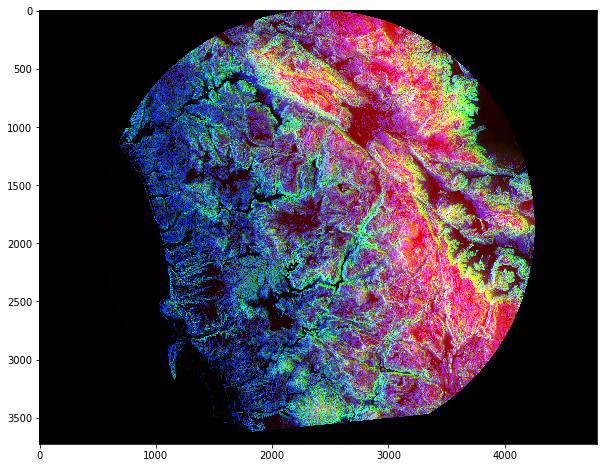

In [69]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

# filtering via the circular mask we created, and assigning the True values to be 0, leaves us with only the False values
# in the middle circle of the the data -> the outside values are made black

photo_data[circular_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Further Masking</p>
<br/>You can further improve the mask. For example, just get the upper half of the disc.

In [107]:
X, Y = np.ogrid[:total_rows, :total_cols]

# this line generates a mask for all rows above the center (below = True, above = False)
# we name it half_upper as it filters out the bottom half
half_upper = X < center_row 
print(half_upper)

# the .logical_and numpy method is used to combine filters -> the row column index applies to all True values in both of
# the filters
half_upper_circular_mask = np.logical_and(circular_mask, half_upper)

[[ True]
 [ True]
 [ True]
 ...
 [False]
 [False]
 [False]]


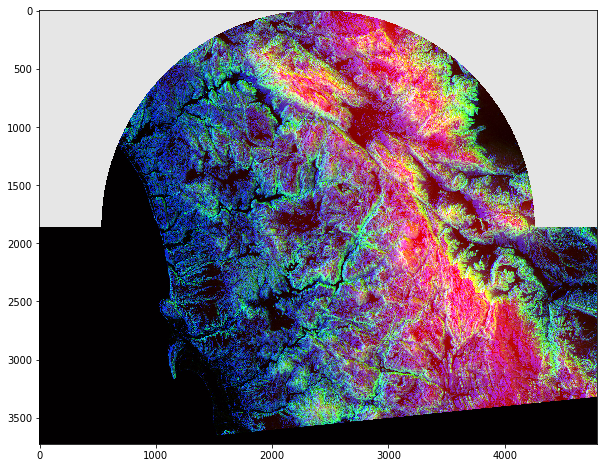

In [108]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

# here we assign the combined filter to our dataset and set the True values to all be white
photo_data[half_upper_circular_mask] = 255

# rather than setting as white, we can use random to set as an RGB value between 200 and 255, or any numbers between 0-255
import random
photo_data[half_upper_circular_mask] = random.randint(200,255)
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

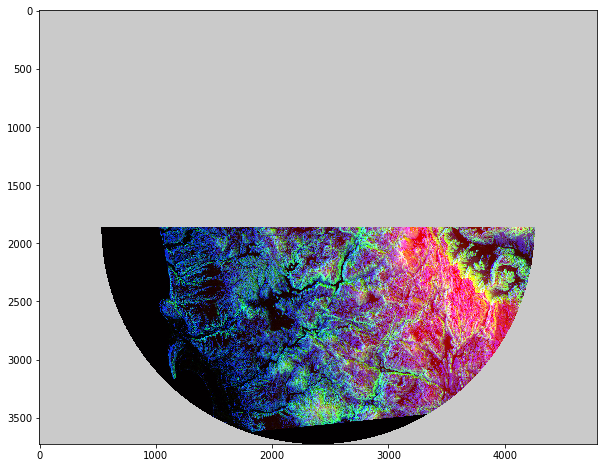

In [109]:
# alternatively, if we use OR ('|') rather than AND ('&'/'np.logical_and'), we find that when combining the 2 boolean
# matrices, TRUE + FALSE = TRUE, and FALSE + TRUE = TRUE -> this leads to many more elements of the matrix satisfying 
# the true condition, and thus being filtered out -> hence we are left with just a semicircle of the original photo

# (remember, AND will only return TRUE if the combination of the 2 boolean matrices is TRUE TRUE)

half_upper_circular_mask = (circular_mask | half_upper)

photo_data = imageio.imread('./wifire/sd-3layers.jpg')

# rather than setting as white, we can use random to set as an RGB value between 200 and 255, or any numbers between 0-255
import random
photo_data[half_upper_circular_mask] = random.randint(200,255)
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Further Processing of our Satellite Imagery </p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Processing of RED Pixels</p>

Remember that red pixels tell us about the height (altitude). Let us try to highlight all the high altitude areas. We will do this by detecting high intensity RED Pixels and muting down other areas.

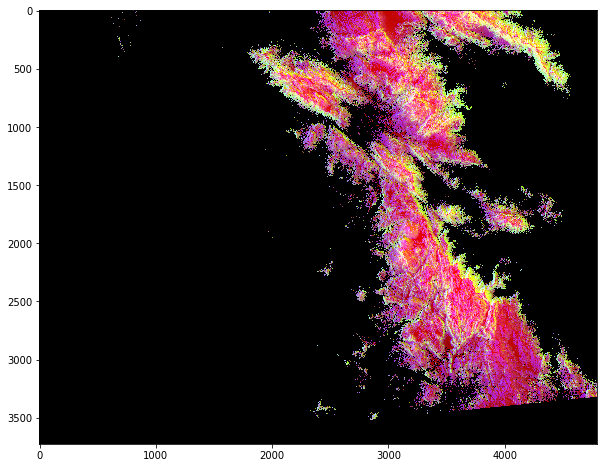

In [94]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

# below index selects all rows x, all columns y, and 0 (red) of the RGB colors in the third dimension -> from this it
# creates a boolean matrix that is True for all R values that are <150
red_mask   = photo_data[:, : ,0] < 150

# the photo is then filtered using the red_mask boolean matrix, setting all of the (True) R values < 150 to 0 (black), thus
# only displaying the higher elevation areas
photo_data[red_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highly-GREEN Pixels</p>

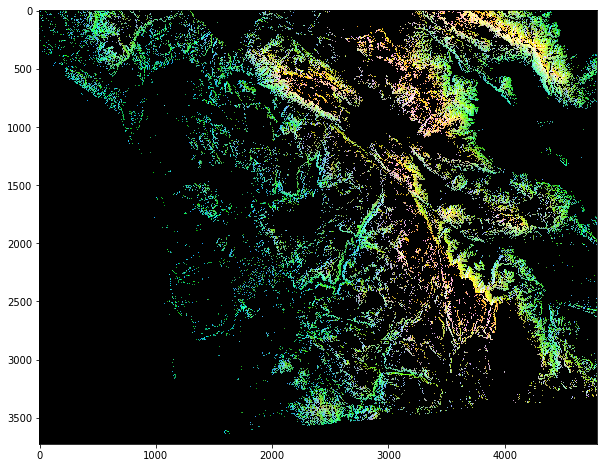

In [96]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

# the same can be done for the green layer that show high slope (checks for index 1 in the 3rd dimension)
green_mask = photo_data[:, : ,1] < 150

photo_data[green_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highly-BLUE Pixels</p>

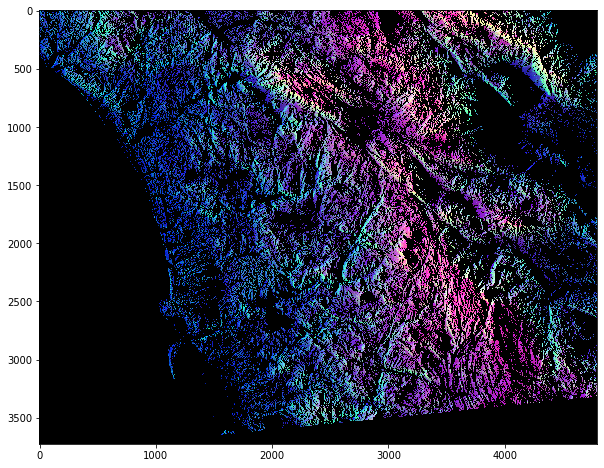

In [97]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

# finally, the same can be done for the blue layer that shows high aspect (checks for index 2 in the 3rd dimension)
blue_mask  = photo_data[:, : ,2] < 150

photo_data[blue_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE</p>

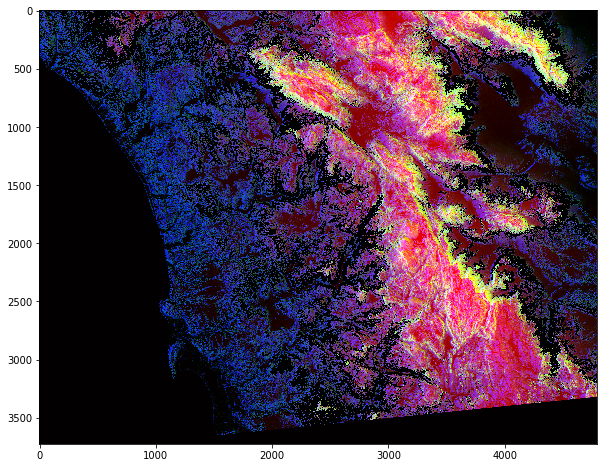

In [98]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')

# the below demonstrates a composite mask (filter) that demonstrates high elevation, low slope, and high aspect.
red_mask   = photo_data[:, : ,0] < 150
green_mask = photo_data[:, : ,1] > 100
blue_mask  = photo_data[:, : ,2] < 100

# the filter is combined by again using the np method .logical_and, and then applied as indexing to the photo data
# where all True values are set to 0 (black)
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0

plt.figure(figsize=(10,10))
plt.imshow(photo_data)